https://www.kaggle.com/code/keitazoumana/comparative-analysis-between-apriori-and-fp-growth
https://www.kaggle.com/code/prasad22/market-basket-analysis-with-apriori-algorithm

In [47]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules, fpgrowth, hmine

In [48]:
df = pd.read_csv('BreadBasket.csv')

In [49]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [50]:
df['Date'] = df['Date'] + ' ' + df['Time']
df['Date'] = pd.to_datetime(df['Date'])

In [51]:
df['month'] = df['Date'].apply(lambda x:x.month)
df['week_day'] = df['Date'].apply(lambda x:x.day_of_week)
df['hour'] = df['Date'].apply(lambda x:x.hour)

In [53]:
df.describe(include=['object', 'datetime'])

C:\Users\romin\AppData\Local\Temp\ipykernel_50284\3241760694.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include=['object', 'datetime'])


,Date,Time,Item
count,20507,20507,20507
unique,9465,8197,94
top,2017-02-17 14:18:20,12:07:39,Coffee
freq,11,16,5471
first,2016-10-30 09:58:11,NaN,NaN
last,2017-04-09 15:04:24,NaN,NaN


In [7]:
df

,Date,Time,Transaction,Item,month,week_day,hour
0,2016-10-30 09:58:11,09:58:11,1,Bread,10,6,9
1,2016-10-30 10:05:34,10:05:34,2,Scandinavian,10,6,10
2,2016-10-30 10:05:34,10:05:34,2,Scandinavian,10,6,10
3,2016-10-30 10:07:57,10:07:57,3,Hot chocolate,10,6,10
4,2016-10-30 10:07:57,10:07:57,3,Jam,10,6,10
...,...,...,...,...,...,...,...
20502,2017-04-09 14:32:58,14:32:58,9682,Coffee,4,6,14
20503,2017-04-09 14:32:58,14:32:58,9682,Tea,4,6,14
20504,2017-04-09 14:57:06,14:57:06,9683,Coffee,4,6,14
20505,2017-04-09 14:57:06,14:57:06,9683,Pastry,4,6,14


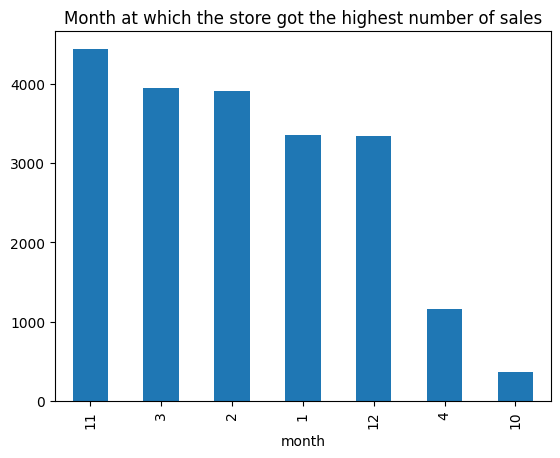

In [92]:
df['month'].value_counts().plot(kind='bar',  title='Month at which the store got the highest number of sales');

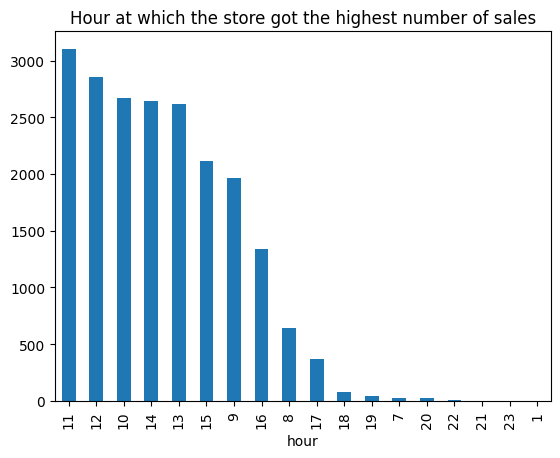

In [93]:
df['hour'].value_counts().plot(kind='bar',  title='Hour at which the store got the highest number of sales');

In [90]:
df['week_day'] = df['week_day'].map(
    {1:'Monday', 2:'Tuesday', 3:'Wednsday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
)

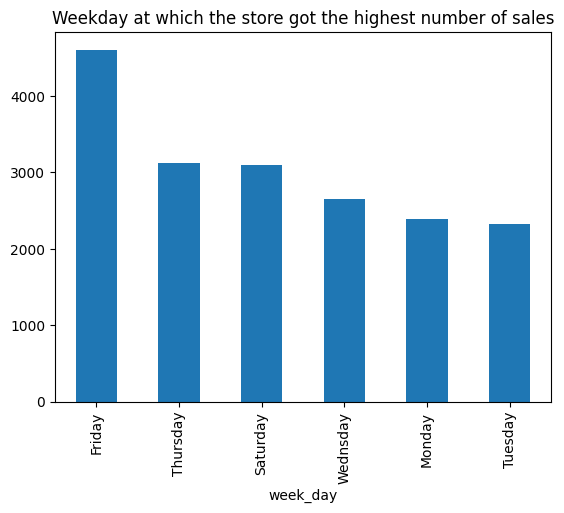

In [94]:
df['week_day'].value_counts().plot(kind='bar',  title='Weekday at which the store got the highest number of sales');

In [17]:
df['Item'].nunique(), df['Item'].unique()

(94,
 array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
        'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
        'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
        "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
        'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
        'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
        'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
        'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
        'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
        'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
        'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
        'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
        'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
        'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
        'Bare Popcorn', 'Muesli', '

In [102]:
df_table = df.groupby('Item').count()['Transaction'].sort_values(ascending=False).reset_index()
df_table.head(10).style.background_gradient(cmap='Blues')

,Item,Transaction
0,Coffee,5471
1,Bread,3325
2,Tea,1435
3,Cake,1025
4,Pastry,856
5,Sandwich,771
6,Medialuna,616
7,Hot chocolate,590
8,Cookies,540
9,Brownie,379


In [8]:
all_transactions = [transaction[1]['Item'].tolist() for transaction in list(df.groupby(['Transaction', 'Date']))]

In [9]:
len(all_transactions)


9465

In [10]:
all_transactions[0:10]

[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna']]

In [11]:

trans_encoder = TransactionEncoder() # Instanciate the encoder
trans_encoder_matrix = trans_encoder.fit(all_transactions).transform(all_transactions)
trans_encoder_matrix = pd.DataFrame(trans_encoder_matrix, columns=trans_encoder.columns_)

In [12]:
trans_encoder_matrix.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
def perform_rule_calculation(transact_items_matrix, rule_type="fpgrowth", min_support=0.001):

    start_time = 0
    total_execution = 0
    
    if(not rule_type=="fpgrowth"):
        start_time = time.time()
        rule_items = apriori(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Apriori!")
        
    else:
        start_time = time.time()
        rule_items = fpgrowth(transact_items_matrix, 
                       min_support=min_support, 
                       use_colnames=True)
        total_execution = time.time() - start_time
        print("Computed Fp Growth!")
    
    rule_items['number_of_items'] = rule_items['itemsets'].apply(lambda x: len(x))
    
    return rule_items, total_execution

In [14]:
def compute_association_rule(rule_matrix, metric="lift", min_thresh=1):
    rules = association_rules(rule_matrix, 
                              metric=metric, 
                              min_threshold=min_thresh)
    
    return rules

In [15]:
# Plot Lift Vs Coverage(confidence) 
def plot_metrics_relationship(rule_matrix, col1, col2):
    fit = np.polyfit(rule_matrix[col1], rule_matrix[col2], 1)
    fit_funt = np.poly1d(fit)
    plt.plot(rule_matrix[col1], rule_matrix[col2], 'yo', rule_matrix[col1], 
    fit_funt(rule_matrix[col1]))
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title('{} vs {}'.format(col1, col2))

In [16]:
def compare_time_exec(algo1=list, algo2=list, algo3=list, algo4=list):

    execution_times = [algo1[1], algo2[1], algo3[1], algo4[1]]
    algo_names = (algo1[0], algo2[0], algo3[0], algo4[0])
    y=np.arange(len(algo_names))
    
    plt.bar(y,execution_times,color=['orange', 'blue'])
    plt.xticks(y,algo_names)
    plt.xlabel('Algorithms')
    plt.ylabel('Time')
    plt.title("Execution Time (seconds) Comparison")
    plt.show()

In [38]:
fpgrowth_matrix, fp_growth_exec_time_sampled = perform_rule_calculation(trans_encoder_matrix.sample(4000)) 
print("Fp Growth execution took: {} seconds".format(fp_growth_exec_time))

Computed Fp Growth!
Fp Growth execution took: 0.07230424880981445 seconds


In [39]:
fpgrowth_matrix, fp_growth_exec_time = perform_rule_calculation(trans_encoder_matrix) 
print("Fp Growth execution took: {} seconds".format(fp_growth_exec_time))

Computed Fp Growth!
Fp Growth execution took: 0.10929512977600098 seconds


In [20]:
fpgrowth_matrix.sort_values('support', ascending=False)

,support,itemsets,number_of_items
6,0.478394,(Coffee),1
0,0.327205,(Bread),1
9,0.142631,(Tea),1
21,0.103856,(Cake),1
57,0.090016,"(Coffee, Bread)",2
...,...,...,...
445,0.001057,"(Chicken Stew, Coke)",2
446,0.001057,"(Chicken Stew, Truffles)",2
203,0.001057,"(Cake, Cookies, Juice)",3
366,0.001057,"(Jammie Dodgers, Coffee, Cake)",3


In [22]:
fpgrowth_matrix[fpgrowth_matrix['number_of_items']>1].sort_values('support', ascending=False)

,support,itemsets,number_of_items
57,0.090016,"(Coffee, Bread)",2
251,0.054728,"(Coffee, Cake)",2
156,0.049868,"(Coffee, Tea)",2
131,0.047544,"(Coffee, Pastry)",2
273,0.038246,"(Coffee, Sandwich)",2
...,...,...,...
238,0.001057,"(Soup, Sandwich, Bread)",3
445,0.001057,"(Chicken Stew, Coke)",2
446,0.001057,"(Chicken Stew, Truffles)",2
350,0.001057,"(Coffee, Cake, Truffles)",3


In [28]:
fp_growth_rule_lift = compute_association_rule(fpgrowth_matrix)
fp_growth_rule_lift.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Scandinavian),(Muffin),0.029054,0.038457,0.001373,0.047273,1.229221,0.000256,1.009253,0.192057
1,(Muffin),(Scandinavian),0.038457,0.029054,0.001373,0.035714,1.229221,0.000256,1.006907,0.193935
2,(Scandinavian),(Farm House),0.029054,0.039197,0.001690,0.058182,1.484342,0.000552,1.020158,0.336065
3,(Farm House),(Scandinavian),0.039197,0.029054,0.001690,0.043127,1.484342,0.000552,1.014707,0.339613
4,(Scandinavian),(Alfajores),0.029054,0.036344,0.001479,0.050909,1.400740,0.000423,1.015346,0.294653


In [29]:
fp_growth_rule = compute_association_rule(fpgrowth_matrix, metric="lift", min_thresh=0.2)
fp_growth_rule.head()#.style.background_gradient(cmap='Blues')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731,-0.586210
1,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,-0.523431
2,(Scandinavian),(Medialuna),0.029054,0.061807,0.001268,0.043636,0.706014,-0.000528,0.981001,-0.300143
3,(Medialuna),(Scandinavian),0.061807,0.029054,0.001268,0.020513,0.706014,-0.000528,0.991280,-0.307400
4,(Scandinavian),(Muffin),0.029054,0.038457,0.001373,0.047273,1.229221,0.000256,1.009253,0.192057


In [33]:
fp_growth_rule = compute_association_rule(fpgrowth_matrix, metric="confidence", min_thresh=0.2)
fp_growth_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,-0.523431
1,(Scandinavian),(Bread),0.029054,0.327205,0.006550,0.225455,0.689030,-0.002956,0.868631,-0.317322
2,"(Coffee, Scandinavian)",(Bread),0.004860,0.327205,0.001268,0.260870,0.797265,-0.000322,0.910251,-0.203523
3,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
4,(Hot chocolate),(Bread),0.058320,0.327205,0.013418,0.230072,0.703144,-0.005665,0.873841,-0.309550


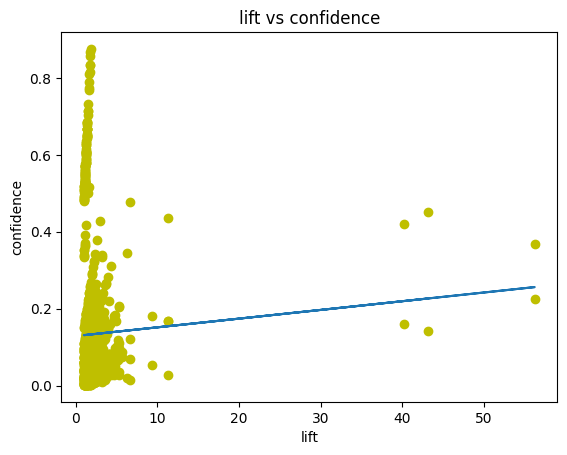

In [32]:
plot_metrics_relationship(fp_growth_rule_lift, col1='lift', col2='confidence')


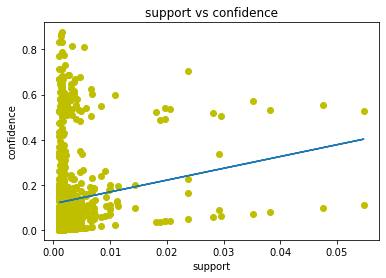

In [46]:
plot_metrics_relationship(fp_growth_rule_lift, col1='support', col2='confidence')


In [40]:
apriori_matrix, apriori_exec_time_sampled = perform_rule_calculation(trans_encoder_matrix.sample(4000), rule_type="apriori")
print("Apriori Execution took: {} seconds".format(apriori_exec_time_sampled))

Computed Apriori!
Apriori Execution took: 0.17055535316467285 seconds


In [41]:
apriori_matrix, apriori_exec_time = perform_rule_calculation(trans_encoder_matrix, rule_type="apriori")
print("Apriori Execution took: {} seconds".format(apriori_exec_time))

Computed Apriori!
Apriori Execution took: 0.2946956157684326 seconds


In [32]:
apriori_matrix.sort_values('support', ascending=False)

,support,itemsets,number_of_items
10,0.478394,(Coffee),1
5,0.327205,(Bread),1
48,0.142631,(Tea),1
7,0.103856,(Cake),1
84,0.090016,"(Coffee, Bread)",2
...,...,...,...
313,0.001057,"(Cookies, Juice, Alfajores)",3
202,0.001057,"(Jammie Dodgers, Cookies)",2
245,0.001057,"(Salad, Juice)",2
38,0.001057,(Postcard),1


In [33]:
apriori_matrix[apriori_matrix['number_of_items']>1].sort_values('support', ascending=False)

,support,itemsets,number_of_items
84,0.090016,"(Coffee, Bread)",2
132,0.054728,"(Coffee, Cake)",2
188,0.049868,"(Coffee, Tea)",2
179,0.047544,"(Coffee, Pastry)",2
181,0.038246,"(Coffee, Sandwich)",2
...,...,...,...
300,0.001057,"(Bread, Alfajores, Brownie)",3
294,0.001057,"(Spanish Brunch, Toast)",2
290,0.001057,"(Soup, Spanish Brunch)",2
385,0.001057,"(Salad, Coffee, Cake)",3


In [34]:
apriori_rule_lift = compute_association_rule(apriori_matrix)
apriori_rule_lift.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Alfajores),(Brownie),0.036344,0.040042,0.002853,0.078488,1.960138,0.001397,1.041721,0.508306
1,(Brownie),(Alfajores),0.040042,0.036344,0.002853,0.071240,1.960138,0.001397,1.037572,0.510264
2,(Cake),(Alfajores),0.103856,0.036344,0.004120,0.039674,1.091624,0.000346,1.003468,0.093661
3,(Alfajores),(Cake),0.036344,0.103856,0.004120,0.113372,1.091624,0.000346,1.010733,0.087100
4,(Coffee),(Alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936,0.220910


In [35]:
apripri_rule = compute_association_rule(apriori_matrix, metric="confidence", min_thresh=0.01)
apripri_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Alfajores),0.327205,0.036344,0.010354,0.031644,0.870657,-0.001538,0.995145,-0.180870
1,(Alfajores),(Bread),0.036344,0.327205,0.010354,0.284884,0.870657,-0.001538,0.940818,-0.133570
2,(Alfajores),(Brownie),0.036344,0.040042,0.002853,0.078488,1.960138,0.001397,1.041721,0.508306
3,(Brownie),(Alfajores),0.040042,0.036344,0.002853,0.071240,1.960138,0.001397,1.037572,0.510264
4,(Cake),(Alfajores),0.103856,0.036344,0.004120,0.039674,1.091624,0.000346,1.003468,0.093661


In [37]:
apripri_rule = compute_association_rule(apriori_matrix, metric="lift", min_thresh=0.2)
apripri_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Alfajores),0.327205,0.036344,0.010354,0.031644,0.870657,-0.001538,0.995145,-0.180870
1,(Alfajores),(Bread),0.036344,0.327205,0.010354,0.284884,0.870657,-0.001538,0.940818,-0.133570
2,(Alfajores),(Brownie),0.036344,0.040042,0.002853,0.078488,1.960138,0.001397,1.041721,0.508306
3,(Brownie),(Alfajores),0.040042,0.036344,0.002853,0.071240,1.960138,0.001397,1.037572,0.510264
4,(Cake),(Alfajores),0.103856,0.036344,0.004120,0.039674,1.091624,0.000346,1.003468,0.093661


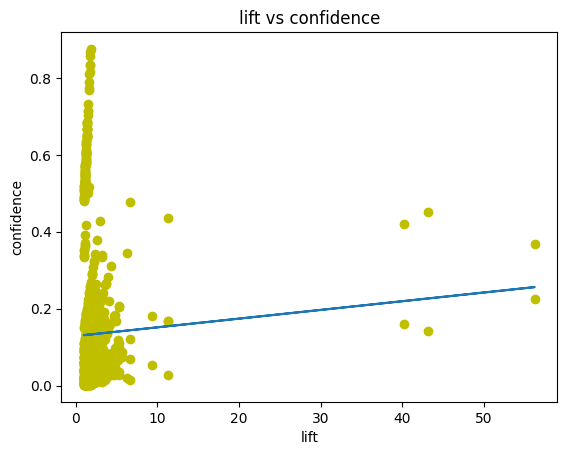

In [77]:
plot_metrics_relationship(apriori_rule_lift, col1='lift', col2='confidence')


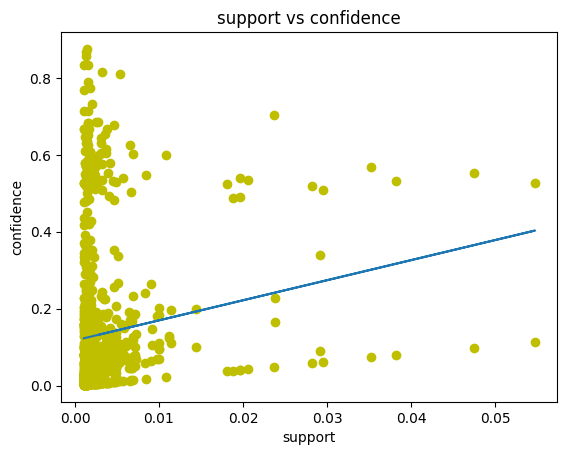

In [106]:
plot_metrics_relationship(apriori_rule_lift, col1='support', col2='confidence')


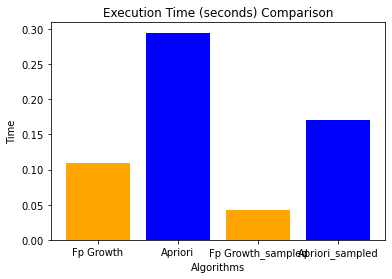

In [42]:
algo1 = ['Fp Growth', fp_growth_exec_time]
algo2 = ['Apriori', apriori_exec_time]
algo3 = ['Fp Growth_sampled', fp_growth_exec_time_sampled]
algo4 = ['Apriori_sampled', apriori_exec_time_sampled]

compare_time_exec(algo1, algo2, algo3, algo4)

In [43]:
hmine_matrix = hmine(trans_encoder_matrix, min_support=0.001, use_colnames=True)
hmine_matrix['number_of_items'] = hmine_matrix['itemsets'].apply(len)
hmine_matrix.sort_values('support', ascending=False)

,support,itemsets,number_of_items
228,0.478394,(Coffee),1
45,0.327205,(Bread),1
458,0.142631,(Tea),1
162,0.103856,(Cake),1
61,0.090016,"(Coffee, Bread)",2
...,...,...,...
182,0.001057,"(Coffee, Cake, Truffles)",3
20,0.001057,"(Cookies, Juice, Alfajores)",3
176,0.001057,"(Coffee, Smoothies, Cake)",3
174,0.001057,"(Coffee, Sandwich, Cake, Tea)",4


In [68]:
hmine_matrix[hmine_matrix['number_of_items']>1].sort_values('support', ascending=False)

,support,itemsets,number_of_items
61,0.090016,"(Bread, Coffee)",2
164,0.054728,"(Cake, Coffee)",2
308,0.049868,"(Tea, Coffee)",2
288,0.047544,"(Pastry, Coffee)",2
294,0.038246,"(Coffee, Sandwich)",2
...,...,...,...
146,0.001057,"(Coffee, Brownie, Medialuna)",3
186,0.001057,"(Cookies, Cake, Juice)",3
58,0.001057,"(Cake, Bread, Soup)",3
289,0.001057,"(Pastry, Scone, Coffee)",3


In [69]:
hmine_rule_lift = compute_association_rule(hmine_matrix)
hmine_rule_lift.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(Bread, Alfajores)",(Brownie),0.010354,0.040042,0.001057,0.102041,2.548328,0.000642,1.069044,0.613943
1,"(Bread, Brownie)",(Alfajores),0.010777,0.036344,0.001057,0.098039,2.697503,0.000665,1.068401,0.636142
2,"(Alfajores, Brownie)",(Bread),0.002853,0.327205,0.001057,0.370370,1.131920,0.000123,1.068556,0.116879
3,(Bread),"(Alfajores, Brownie)",0.327205,0.002853,0.001057,0.003229,1.131920,0.000123,1.000378,0.173226
4,(Alfajores),"(Bread, Brownie)",0.036344,0.010777,0.001057,0.029070,2.697503,0.000665,1.018841,0.653021


In [44]:
hmine_rule = compute_association_rule(hmine_matrix, metric="confidence", min_thresh=0.001)
hmine_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Alfajores),0.327205,0.036344,0.010354,0.031644,0.870657,-0.001538,0.995145,-0.180870
1,(Alfajores),(Bread),0.036344,0.327205,0.010354,0.284884,0.870657,-0.001538,0.940818,-0.133570
2,"(Bread, Alfajores)",(Brownie),0.010354,0.040042,0.001057,0.102041,2.548328,0.000642,1.069044,0.613943
3,"(Bread, Brownie)",(Alfajores),0.010777,0.036344,0.001057,0.098039,2.697503,0.000665,1.068401,0.636142
4,"(Alfajores, Brownie)",(Bread),0.002853,0.327205,0.001057,0.370370,1.131920,0.000123,1.068556,0.116879


In [45]:
hmine_rule = compute_association_rule(hmine_matrix, metric="lift", min_thresh=0.001)
hmine_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Bread),(Alfajores),0.327205,0.036344,0.010354,0.031644,0.870657,-0.001538,0.995145,-0.180870
1,(Alfajores),(Bread),0.036344,0.327205,0.010354,0.284884,0.870657,-0.001538,0.940818,-0.133570
2,"(Bread, Alfajores)",(Brownie),0.010354,0.040042,0.001057,0.102041,2.548328,0.000642,1.069044,0.613943
3,"(Bread, Brownie)",(Alfajores),0.010777,0.036344,0.001057,0.098039,2.697503,0.000665,1.068401,0.636142
4,"(Alfajores, Brownie)",(Bread),0.002853,0.327205,0.001057,0.370370,1.131920,0.000123,1.068556,0.116879


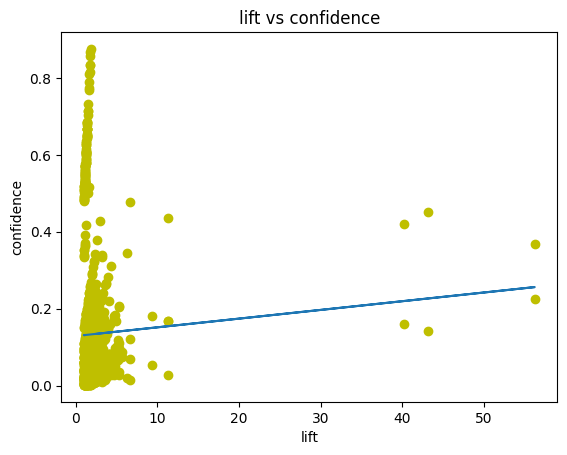

In [75]:
plot_metrics_relationship(hmine_rule_lift, col1='lift', col2='confidence')

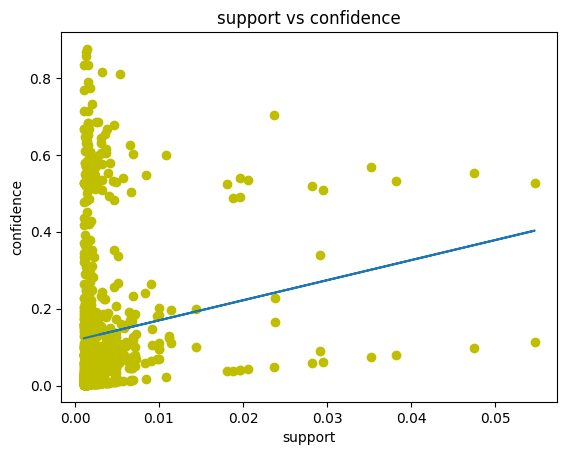

In [108]:
plot_metrics_relationship(hmine_rule_lift, col1='support', col2='confidence')